In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/College Assignments/ML Assign/Data Sets/MLK/Social_Network_Ads.csv')

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.drop('User ID',axis=1,inplace=True)

In [8]:
df = pd.get_dummies(data=df,columns=['Gender'],drop_first=True,)

In [9]:
df = df.iloc[:,[0,1,3,2]]

In [10]:
df

,Age,EstimatedSalary,Gender_Male,Purchased
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0
...,...,...,...,...
395,46,41000,0,1
396,51,23000,1,1
397,50,20000,0,1
398,36,33000,1,0


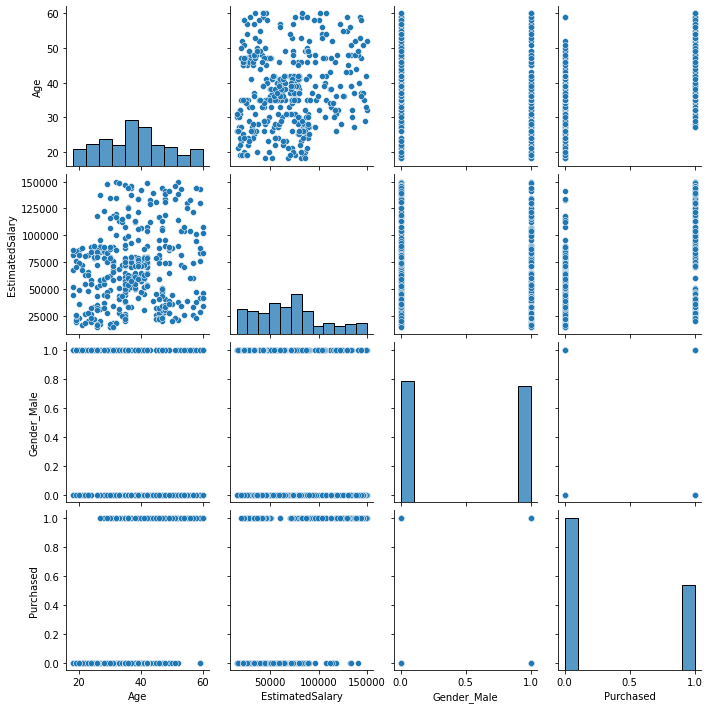

In [11]:
sns.pairplot(df)

<AxesSubplot:>

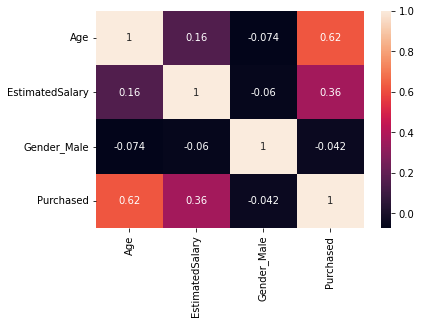

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df

,Age,EstimatedSalary,Gender_Male,Purchased
0,19,19000,1,0
1,35,20000,1,0
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,1,0
...,...,...,...,...
395,46,41000,0,1
396,51,23000,1,1
397,50,20000,0,1
398,36,33000,1,0


In [14]:
X = df.iloc[:,:-2]
y = df.iloc[:,-1]

# Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
sc = RobustScaler()
SCX_train = sc.fit_transform(X_train)
SCX_test = sc.fit_transform(X_test) 

In [16]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.5 MB/s eta 0:00:00


In [17]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [18]:
pipeline_gnb = Pipeline([
    ('GNB', GaussianNB())
])

pipeline_lr = Pipeline([
    ('LR', LogisticRegression() )
])

pipeline_bnb = Pipeline([
    ('BNB', BernoulliNB())
])

pipeline_cb = Pipeline([
    ('CB', CatBoostClassifier(verbose=0))
])

pipeline_xgb = Pipeline([
    ('XGB', XGBClassifier(verbosity=0))
])
# Train and test the models
pipelines = [pipeline_gnb ,pipeline_lr ,pipeline_bnb,pipeline_cb,pipeline_xgb]
model_names = ['Gaussian','Log Reg','Bernoulli','Catboost','XGBoost']

In [19]:
for pipeline, model_name in zip(pipelines, model_names):
    pipeline.fit(SCX_train, y_train)
    y_pred = pipeline.predict(SCX_test)
    print(model_name)
    print('Accuracy:', accuracy_score(y_test, y_pred)*100)
    print('Classification Metrics:', classification_report(y_test,y_pred))
    print('ROC AUC score:', roc_auc_score(y_test, y_pred, multi_class='ovr'))
    print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
    print('\n\n')

Gaussian
Accuracy: 91.66666666666666
Classification Metrics:               precision    recall  f1-score   support

           0       0.96      0.91      0.94        80
           1       0.84      0.93      0.88        40

    accuracy                           0.92       120
   macro avg       0.90      0.92      0.91       120
weighted avg       0.92      0.92      0.92       120

ROC AUC score: 0.91875
Confusion Matrix
 [[73  7]
 [ 3 37]]



Log Reg
Accuracy: 82.5
Classification Metrics:               precision    recall  f1-score   support

           0       0.85      0.90      0.87        80
           1       0.77      0.68      0.72        40

    accuracy                           0.82       120
   macro avg       0.81      0.79      0.80       120
weighted avg       0.82      0.82      0.82       120

ROC AUC score: 0.7875000000000001
Confusion Matrix
 [[72  8]
 [13 27]]



Bernoulli
Accuracy: 73.33333333333333
Classification Metrics:               precision    recall  f1-s

In [20]:
for pipeline, model_name in zip(pipelines, model_names):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(model_name)
    print('Accuracy:', accuracy_score(y_test, y_pred)*100)
    print('Classification Metrics:', classification_report(y_test,y_pred))
    print('ROC AUC score:', roc_auc_score(y_test, y_pred, multi_class='ovr'))
    print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
    print('\n\n')

Gaussian
Accuracy: 91.66666666666666
Classification Metrics:               precision    recall  f1-score   support

           0       0.95      0.93      0.94        80
           1       0.86      0.90      0.88        40

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

ROC AUC score: 0.9125000000000001
Confusion Matrix
 [[74  6]
 [ 4 36]]



Log Reg
Accuracy: 66.66666666666666
Classification Metrics:               precision    recall  f1-score   support

           0       0.67      1.00      0.80        80
           1       0.00      0.00      0.00        40

    accuracy                           0.67       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.44      0.67      0.53       120

ROC AUC score: 0.5
Confusion Matrix
 [[80  0]
 [40  0]]



Bernoulli
Accuracy: 66.66666666666666
Classification Metrics:               precision    rec

In [21]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [22]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
smote = SMOTE()

In [25]:
X2,y2 = smote.fit_resample(X,y)

In [26]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101)

In [27]:
SCX2_train = sc.fit_transform(X2_train)
SCX2_test = sc.fit_transform(X2_test) 

In [28]:
for pipeline, model_name in zip(pipelines, model_names):
    pipeline.fit(SCX2_train, y2_train)
    y_pred = pipeline.predict(SCX2_test)
    print(model_name)
    print('Accuracy:', accuracy_score(y2_test, y_pred)*100)
    print('Classification Metrics:', classification_report(y2_test,y_pred))
    print('ROC AUC score:', roc_auc_score(y2_test, y_pred, multi_class='ovr'))
    print('Confusion Matrix\n',confusion_matrix(y2_test,y_pred))
    print('\n\n')

Gaussian
Accuracy: 85.80645161290322
Classification Metrics:               precision    recall  f1-score   support

           0       1.00      0.76      0.87        93
           1       0.74      1.00      0.85        62

    accuracy                           0.86       155
   macro avg       0.87      0.88      0.86       155
weighted avg       0.90      0.86      0.86       155

ROC AUC score: 0.8817204301075269
Confusion Matrix
 [[71 22]
 [ 0 62]]



Log Reg
Accuracy: 81.93548387096774
Classification Metrics:               precision    recall  f1-score   support

           0       1.00      0.70      0.82        93
           1       0.69      1.00      0.82        62

    accuracy                           0.82       155
   macro avg       0.84      0.85      0.82       155
weighted avg       0.88      0.82      0.82       155

ROC AUC score: 0.8494623655913979
Confusion Matrix
 [[65 28]
 [ 0 62]]



Bernoulli
Accuracy: 77.41935483870968
Classification Metrics:               p

In [29]:
for pipeline, model_name in zip(pipelines, model_names):
    pipeline.fit(X2_train, y2_train)
    y_pred = pipeline.predict(X2_test)
    print(model_name)
    print('Accuracy:', accuracy_score(y2_test, y_pred)*100)
    print('Classification Metrics:', classification_report(y2_test,y_pred))
    print('ROC AUC score:', roc_auc_score(y2_test, y_pred, multi_class='ovr'))
    print('Confusion Matrix\n',confusion_matrix(y2_test,y_pred))
    print('\n\n')

Gaussian
Accuracy: 90.32258064516128
Classification Metrics:               precision    recall  f1-score   support

           0       0.96      0.87      0.92        93
           1       0.83      0.95      0.89        62

    accuracy                           0.90       155
   macro avg       0.90      0.91      0.90       155
weighted avg       0.91      0.90      0.90       155

ROC AUC score: 0.9112903225806452
Confusion Matrix
 [[81 12]
 [ 3 59]]



Log Reg
Accuracy: 40.0
Classification Metrics:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.40      1.00      0.57        62

    accuracy                           0.40       155
   macro avg       0.20      0.50      0.29       155
weighted avg       0.16      0.40      0.23       155

ROC AUC score: 0.5
Confusion Matrix
 [[ 0 93]
 [ 0 62]]



Bernoulli
Accuracy: 40.0
Classification Metrics:               precision    recall  f1-score   support

 

In [30]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1)
X3,y3 = nm.fit_resample(X,y)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)
SCX3_train = sc.fit_transform(X3_train)
SCX3_test = sc.fit_transform(X3_test) 

In [31]:
for pipeline, model_name in zip(pipelines, model_names):
    pipeline.fit(SCX3_train, y3_train)
    y_pred = pipeline.predict(SCX3_test)
    print(model_name)
    print('Accuracy:', accuracy_score(y3_test, y_pred)*100)
    print('Classification Metrics:', classification_report(y3_test,y_pred))
    print('ROC AUC score:', roc_auc_score(y3_test, y_pred, multi_class='ovr'))
    print('Confusion Matrix\n',confusion_matrix(y3_test,y_pred))
    print('\n\n')

Gaussian
Accuracy: 93.10344827586206
Classification Metrics:               precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.94      0.94      0.94        34

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.93      0.93      0.93        58

ROC AUC score: 0.9289215686274509
Confusion Matrix
 [[22  2]
 [ 2 32]]



Log Reg
Accuracy: 87.93103448275862
Classification Metrics:               precision    recall  f1-score   support

           0       0.87      0.83      0.85        24
           1       0.89      0.91      0.90        34

    accuracy                           0.88        58
   macro avg       0.88      0.87      0.87        58
weighted avg       0.88      0.88      0.88        58

ROC AUC score: 0.872549019607843
Confusion Matrix
 [[20  4]
 [ 3 31]]



Bernoulli
Accuracy: 79.3103448275862
Classification Metrics:               pre

In [32]:
for pipeline, model_name in zip(pipelines, model_names):
    pipeline.fit(X3_train, y3_train)
    y_pred = pipeline.predict(X3_test)
    print(model_name)
    print('Accuracy:', accuracy_score(y3_test, y_pred)*100)
    print('Classification Metrics:', classification_report(y3_test,y_pred))
    print('ROC AUC score:', roc_auc_score(y3_test, y_pred, multi_class='ovr'))
    print('Confusion Matrix\n',confusion_matrix(y3_test,y_pred))
    print('\n\n')

Gaussian
Accuracy: 93.10344827586206
Classification Metrics:               precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.88      0.94        34

    accuracy                           0.93        58
   macro avg       0.93      0.94      0.93        58
weighted avg       0.94      0.93      0.93        58

ROC AUC score: 0.9411764705882353
Confusion Matrix
 [[24  0]
 [ 4 30]]



Log Reg
Accuracy: 58.620689655172406
Classification Metrics:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.59      1.00      0.74        34

    accuracy                           0.59        58
   macro avg       0.29      0.50      0.37        58
weighted avg       0.34      0.59      0.43        58

ROC AUC score: 0.5
Confusion Matrix
 [[ 0 24]
 [ 0 34]]



Bernoulli
Accuracy: 41.37931034482759
Classification Metrics:               precision    re